In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [2]:
# Approximation of the 99 % confidence interval of the mean.
# See: Theorem 2.2 in J.-I. Le Boudec: Performance Evaluation of Computer and Communication Systems. 
# EPFL Press, 2010 (available online: https://leboudec.github.io/perfeval/)
#
# Requirements: 
# (1) data is iid
# (2) data has finite variance 
# (3) number of samples is large 
def mean_99confint(data):
    m = np.mean(data)
    sem = stats.sem(data) # standard error of the mean (sem) = sigma / sqrt(n) 
    h = 2.58*sem
    return m-h, m+h

# Confidence interval of the mean.
# See: Theorem 2.3 in J.-I. Le Boudec: Performance Evaluation of Computer and Communication Systems. 
# EPFL Press, 2010 (available online: https://leboudec.github.io/perfeval/)
#
# Requirements:
# (1) iid data 
# (2) normally distributed data. See Q-Q-plot for a visual indication that our data is approximately 
#     normally distributed.
def mean_confint(data, confidence=0.95):
    n = len(data)
    m = np.mean(data)
    sem = stats.sem(data) # standard error of the mean (sem) = sigma / sqrt(n) 
    h = sem * stats.t.ppf((1.0+confidence)/2.0, n-1)
    return m-h, m+h

In [3]:
file_nodelay='log-p80-i60-d0-nodelay.csv'
_df_nodelay = pd.read_csv(file_nodelay, names=['t', 'angle'])
_df_nodelay.head()

,t,angle
0,74,-5.000000
1,12462,-5.000030
2,63185,-4.874931
3,64104,-4.863479
4,65037,-4.851693


In [4]:
#file_delay='log-p80-i60-d0-delay5g1.csv'
file_delay='log-p80-i60-d0-delay5g2a.csv'
_df_delay = pd.read_csv(file_delay, names=['t', 'angle'])
_df_delay.head()

,t,angle
0,82,-5.000000
1,12535,-5.000033
2,20227,-4.999868
3,33083,-4.976416
4,40032,-4.949002


In [5]:
t_last = min(max(_df_delay['t']), max(_df_nodelay['t']))
df_delay = _df_delay[_df_delay['t'] <= t_last]
df_nodelay = _df_nodelay[_df_nodelay['t'] <= t_last]

In [6]:
# Square errors
se_delay = df_delay['angle']**2
se_nodelay = df_nodelay['angle']**2
# Mean square errors
mse_delay = se_delay.sum()/len(se_delay)
mse_nodelay = se_nodelay.sum()/len(se_nodelay)
print("Mean square error w/o delay = " + str(mse_nodelay))
print("Mean square error w/ delay = " + str(mse_delay))

Mean square error w/o delay = 0.636095698220736
Mean square error w/ delay = 1.1383729133998015


In [7]:
mean_l,mean_h = mean_confint(df_nodelay['angle'], confidence=0.99)
print("w/o delay: mean_conf99 = [" + str(mean_l) + " s, " + str(mean_h) + " s]")
mean_l,mean_h = mean_confint(df_delay['angle'], confidence=0.99)
print("w/ delay: mean_conf99 = [" + str(mean_l) + " s, " + str(mean_h) + " s]")

w/o delay: mean_conf99 = [-0.1885662757985897 s, -0.09983690457659072 s]
w/ delay: mean_conf99 = [-0.2066023438623721 s, -0.08706223430020607 s]


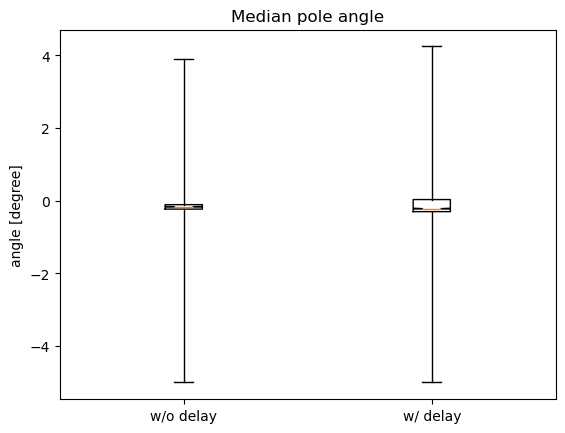

In [8]:
data = [df_nodelay['angle'], df_delay['angle']]

labels = ['w/o delay', 'w/ delay']
_ = plt.boxplot(data, notch=True, whis=[0,100], labels=labels)
plt.ylabel('angle [degree]')
plt.xlabel('');
plt.title('Median pole angle');

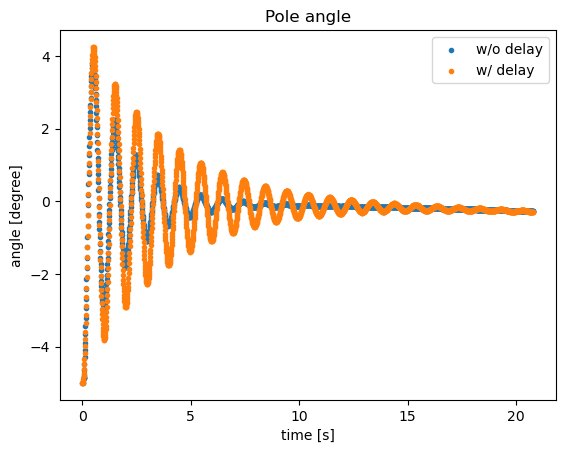

In [9]:
plt.scatter(df_nodelay['t']/1000000, df_nodelay['angle'], marker='.', label="w/o delay")
plt.scatter(df_delay['t']/1000000, df_delay['angle'],  marker='.', label="w/ delay")
plt.ylabel('angle [degree]')
plt.xlabel('time [s]');
plt.title('Pole angle');
plt.legend(loc="upper right");